In [2]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

In [3]:
def pre_emphasis(signal, alpha=0.95):
    print(signal[0])
    emphasized_signal = np.append(signal[0], signal[1:] - alpha * signal[:-1])
    return emphasized_signal

In [4]:
sample_rate, audio = wav.read('hello.wav')
alpha = 0.95  # Koefisien pre-emphasis
emphasized_audio = pre_emphasis(audio, alpha)

[55  6]


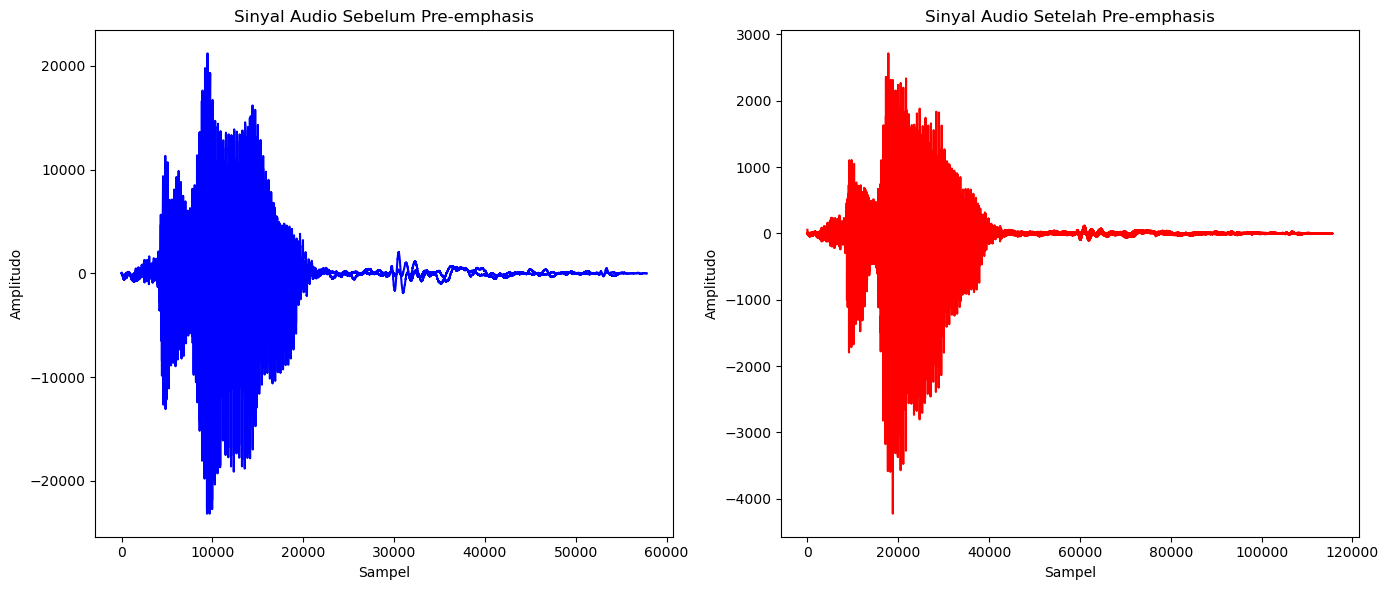

In [5]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(audio, color='b')
plt.title("Sinyal Audio Sebelum Pre-emphasis")
plt.xlabel("Sampel")
plt.ylabel("Amplitudo")

plt.subplot(1, 2, 2)
plt.plot(emphasized_audio, color='r')
plt.title("Sinyal Audio Setelah Pre-emphasis")
plt.xlabel("Sampel")
plt.ylabel("Amplitudo")

plt.tight_layout()
plt.show()

In [1]:
emphasized_audio

NameError: name 'emphasized_audio' is not defined

In [13]:
def framing(sig, fs=16000, win_len=0.025, win_hop=0.01):
    """
    transform a signal into a series of overlapping frames.

    Args:
        sig            (array) : a mono audio signal (Nx1) from which to compute features.
        fs               (int) : the sampling frequency of the signal we are working with.
                                 Default is 16000.
        win_len        (float) : window length in sec.
                                 Default is 0.025.
        win_hop        (float) : step between successive windows in sec.
                                 Default is 0.01.

    Returns:
        array of frames.
        frame length.
    """
    # compute frame length and frame step (convert from seconds to samples)
    frame_length = win_len * fs
    frame_step = win_hop * fs
    signal_length = len(sig)
    frames_overlap = frame_length - frame_step

    # Make sure that we have at least 1 frame+
    num_frames = np.abs(signal_length - frames_overlap) // np.abs(frame_length - frames_overlap)
    rest_samples = np.abs(signal_length - frames_overlap) % np.abs(frame_length - frames_overlap)

    # Pad Signal to make sure that all frames have equal number of samples
    # without truncating any samples from the original signal
    if rest_samples != 0:
        pad_signal_length = int(frame_step - rest_samples)
        z = np.zeros(pad_signal_length)
        pad_signal = np.append(sig, z)
        num_frames += 1
    else:
        pad_signal = sig

    # make sure to use integers as indices
    frame_length = int(frame_length)
    frame_step = int(frame_step)
    num_frames = int(num_frames)

    # compute indices
    idx1 = np.tile(np.arange(0, frame_length), (num_frames, 1))
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_length, 1)).T
    indices = idx1 + idx2
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    return frames

In [24]:
framing(emphasized_audio)

array([ 5.500e+01,  6.000e+00, -1.250e+00, -1.270e+01, -3.450e+00,
        6.500e-01, -3.750e+00,  7.000e-01,  2.950e+00, -1.225e+01,
       -5.000e+00,  5.150e+00,  2.650e+00,  1.545e+01,  7.000e-01,
       -1.075e+01, -8.350e+00, -3.000e-01, -1.285e+01,  5.700e+00,
       -3.550e+00, -1.000e+00, -7.500e-01, -4.050e+00, -3.800e+00,
        2.750e+00,  3.000e+00, -1.010e+01, -3.850e+00, -4.600e+00,
       -5.000e-02,  1.420e+01,  9.500e-01, -4.050e+00, -8.000e+00,
       -2.250e+00,  1.160e+01, -9.350e+00, -3.800e+00, -1.800e+00,
       -2.000e+00,  1.015e+01,  1.900e+00, -1.630e+01, -7.000e+00,
       -1.310e+01, -3.500e-01,  1.030e+01, -4.350e+00, -1.410e+01,
       -2.550e+00,  5.250e+00, -1.165e+01, -6.400e+00, -6.200e+00,
       -8.650e+00, -3.450e+00, -7.000e+00,  4.500e-01, -1.250e+00,
        2.550e+00,  1.800e+00,  5.750e+00, -7.000e+00, -6.900e+00,
        3.750e+00, -1.200e+00,  3.050e+00, -6.200e+00, -6.700e+00,
       -1.445e+01, -1.950e+00, -1.100e+00,  4.050e+00, -3.050e